<a href="https://colab.research.google.com/github/saeedgolzar/AML_Course/blob/main/Project/Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning Project

Saeed Golzar | Summer 2022

---

Import libraries

In [ ]:
import re
import random
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import data_table
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data_table.enable_dataframe_formatter()

# Part 2: Solve a real problem

## Load Weather Data

In [ ]:
!gdown --id 1uBXj5fGE1i3f7RqFhitoPPaaI2gjc967

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1uBXj5fGE1i3f7RqFhitoPPaaI2gjc967
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 130MB/s]


In [ ]:
weather = pd.read_csv('weatherAUS.csv')

In [ ]:
weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [ ]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Preprocessing

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
weather = weather.dropna(subset=['RainTomorrow'])

In [ ]:
weather.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


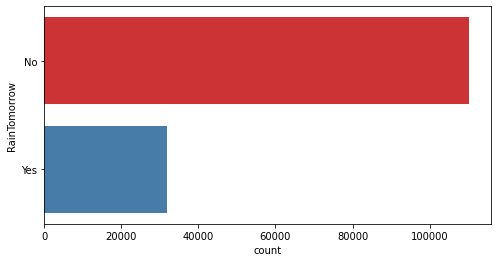

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=weather, palette="Set1")
plt.savefig("rain_tomo.svg")

In [ ]:
weather["Date"]=pd.to_datetime(weather["Date"])
weather["year"]=weather["Date"].dt.year
weather["month"]=weather["Date"].dt.month
weather["day"]=weather["Date"].dt.day
weather.drop("Date",axis=1,inplace=True)

In [ ]:
le = preprocessing.LabelEncoder()
weather['RainTomorrow'] = le.fit_transform(weather['RainTomorrow'])

In [ ]:
X = weather.drop(['RainTomorrow'], axis=1)

y = weather['RainTomorrow']

### Fix missing values in numerical variables 

In [ ]:
numerical = [col for col in X.columns if X[col].dtypes != 'O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The categorical variables are :', numerical)

There are 19 numerical variables

The categorical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'year', 'month', 'day']


In [ ]:
# replace null value with column median

for col in numerical:
  X[col].fillna(X[col].median(), inplace=True)

In [ ]:
X[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

### Fix missing values in categorical variables

In [ ]:
# find categorical variables

categorical = [var for var in X.columns if X[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 5 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
# replace null value with column mode

for col in categorical:
  X[col].fillna(X[col].mode()[0], inplace=True)

In [ ]:
X[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Split data into three sets 
train (80%), validation (10%), and test (10%)

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size = 0.8, random_state = 0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

### Find correlation between features

In [ ]:
corr_weather = weather.corr()

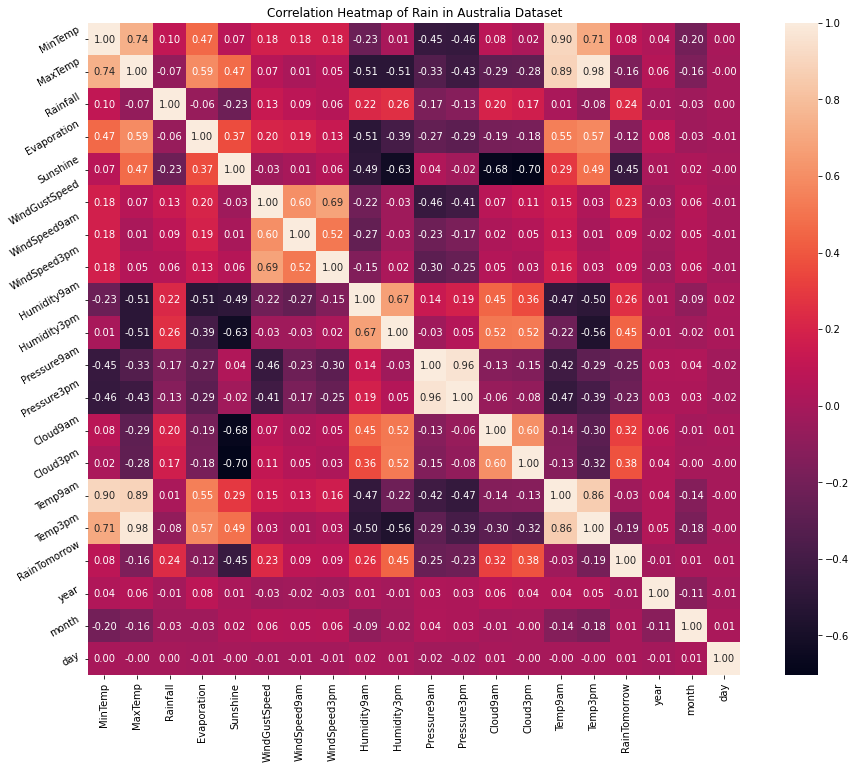

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(corr_weather, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.savefig("corr_heatmap.svg")

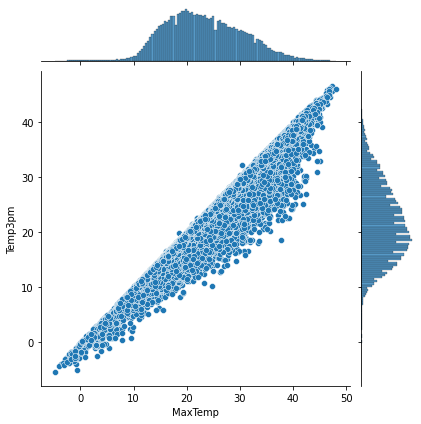

In [ ]:
g = sns.JointGrid(data=weather, x='MaxTemp', y='Temp3pm')
g.plot(sns.scatterplot, sns.histplot)
plt.savefig("corr_temp.png")

### Feature Engineering

In [ ]:
for df in [X_train, X_valid, X_test]:
  # delete highest correlation features
  df.drop('Temp3pm', axis=1, inplace=True)

  # define diff parameter for max and min temp
  df["MinMax_diff"]=df["MaxTemp"]-df["MinTemp"]

  # drop max and min temp
  df.drop('MaxTemp', axis=1, inplace=True)
  df.drop('MinTemp', axis=1, inplace=True)


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True, columns=categorical)
X_valid = pd.get_dummies(X_valid, drop_first=True, columns=categorical)
X_test = pd.get_dummies(X_test, drop_first=True, columns=categorical)

In [ ]:
X_train.head(10)

,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
113462,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,1013.9,1013.4,...,0,1,0,0,0,0,0,0,0,0
89638,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,1016.9,1013.1,...,0,0,1,0,0,0,0,0,0,1
138130,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,1018.1,1013.6,...,0,0,0,0,0,0,0,0,0,0
87898,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,1014.1,1010.8,...,0,0,0,0,0,0,0,0,0,0
16484,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,1017.6,1015.2,...,0,0,1,0,0,0,0,0,0,0
59383,14.8,4.8,8.5,54.0,9.0,31.0,96.0,67.0,1009.2,1008.9,...,0,0,0,0,0,0,0,0,1,1
128970,0.0,4.8,8.5,30.0,9.0,13.0,76.0,61.0,1019.8,1019.7,...,0,1,0,0,0,0,0,0,0,0
133255,25.0,4.8,8.5,28.0,4.0,17.0,98.0,67.0,998.1,997.6,...,0,0,0,0,0,0,0,0,0,1
127878,0.6,4.8,8.5,39.0,15.0,24.0,65.0,71.0,1015.3,1012.7,...,0,0,0,0,0,0,0,0,0,0
44161,20.2,4.8,8.5,41.0,15.0,31.0,83.0,72.0,1024.7,1023.2,...,0,0,0,0,1,0,0,0,0,1


### Define Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=20, input_dim=111, activation="relu"))
model.add(tf.keras.layers.Dense(units=100, activation="relu"))
model.add(tf.keras.layers.Dense(units=100, activation="relu"))
model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer='adam',
            loss="binary_crossentropy",
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                2240      
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,541
Trainable params: 14,541
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), validation_freq=1)

Epoch 1/20
3555/3555 [==============================] - 9s 2ms/step - loss: 0.5558 - accuracy: 0.8028 - val_loss: 0.3681 - val_accuracy: 0.8416
Epoch 2/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3858 - accuracy: 0.8328 - val_loss: 0.3622 - val_accuracy: 0.8450
Epoch 3/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3775 - accuracy: 0.8368 - val_loss: 0.3648 - val_accuracy: 0.8455
Epoch 4/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3737 - accuracy: 0.8387 - val_loss: 0.3678 - val_accuracy: 0.8415
Epoch 5/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3719 - accuracy: 0.8385 - val_loss: 0.3719 - val_accuracy: 0.8406
Epoch 6/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3699 - accuracy: 0.8400 - val_loss: 0.3709 - val_accuracy: 0.8415
Epoch 7/20
3555/3555 [==============================] - 8s 2ms/step - loss: 0.3688 - accuracy: 0.8403 - val_loss: 0.3619 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

445/445 - 1s - loss: 0.3545 - accuracy: 0.8461 - 898ms/epoch - 2ms/step
